<a href="https://colab.research.google.com/github/charchit/Presentation/blob/main/OpenCV/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Resources**

You can find more details about Colab [ here](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt#scrollTo=CXnyoIOFGCYk)



In [29]:
# Nvidia System Management Interface: Used to check GPU resources
!nvidia-smi

Wed Apr 10 06:47:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [30]:
# Print working directory
!pwd
# Make directory
!mkdir tempdir
# List
!ls

/content/Presentation/OpenCV
elephant.png  lung.png	OpenCV.ipynb  Presentation  rgb_pixels.png  tempdir


## Managing Python packages

In [31]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [33]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [32]:
import torch

torch.cuda.is_available()

True

In [38]:
# Clone the repository
!git clone https://github.com/charchit/Presentation.git

!ls

# To remove
#!rm -rf Presentation

Cloning into 'Presentation'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 24 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 872.75 KiB | 3.50 MiB/s, done.
Resolving deltas: 100% (1/1), done.
elephant.png  lung.png	OpenCV.ipynb  Presentation  rgb_pixels.png  tempdir


## OpenCV

The shape and datatype of img_rgb is :(480, 484, 3), and <class 'numpy.ndarray'>



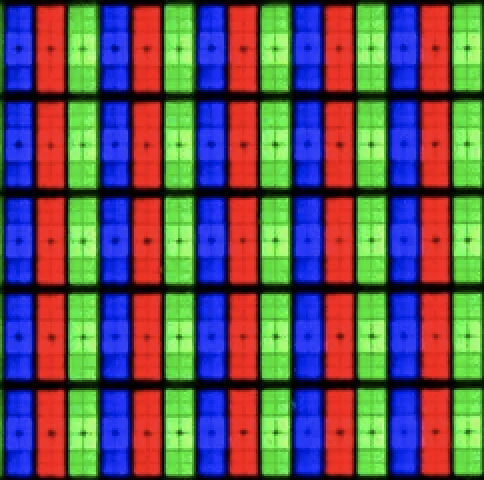

In [14]:
import cv2
from google.colab.patches import cv2_imshow
# Last argument 1 is for rgb, 0 is for grayscale

img_rgb = cv2.imread('rgb_pixels.png', 1)

# Img source: https://www.cnet.com/tech/home-entertainment/led-lcd-vs-oled/

# Checking shape and datatype of the loaded image
print(f'The shape and datatype of img_rgb is :{img_rgb.shape}, and {type(img_rgb)}\n')

# Show the original image
cv2_imshow(img_rgb)

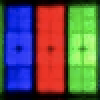

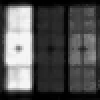

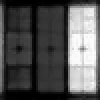

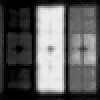

In [15]:
# Be careful of the RGB channel sequence when using different image processing packages, some has a sequence of RGB, while some is BGR

cv2_imshow(img_rgb[:100,:100,:])
cv2_imshow(img_rgb[:100,:100,0])
cv2_imshow(img_rgb[:100,:100,1])
cv2_imshow(img_rgb[:100,:100,2])

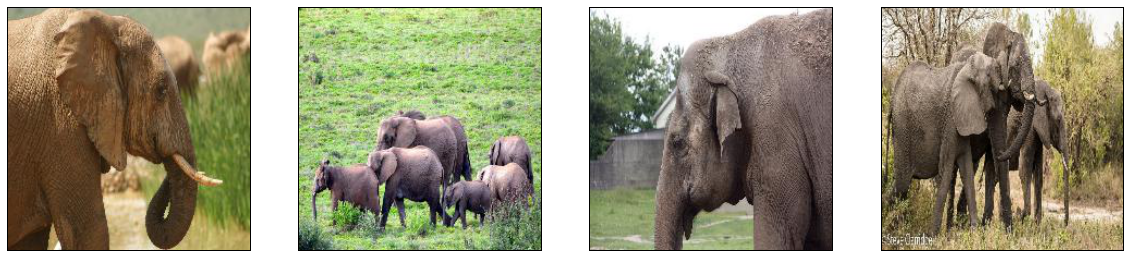

In [16]:
img = cv2.imread('elephant.png', 1)
cv2_imshow(img)

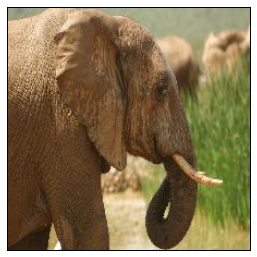

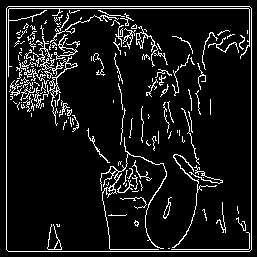

In [17]:
# Source: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
# Arguments are (img, threshold1, threshold2)
# img[:,:257,:] means we are cropping the image through matrix slicing. We are getting all the rows, columns until the 256th, and all RGB channels
edges = cv2.Canny(img[:,:257,:], 100, 200)
cv2_imshow(img[:,:257,:])
cv2_imshow(edges)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

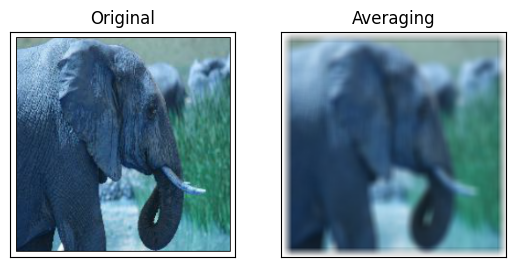

In [22]:
# Try changing kernel size and observe what happens
kernel = np.ones((10,10), np.float32)/100

# Arguments are (source_image, depth, kernel)
dst = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

plt.subplot(121)
plt.imshow(img[:,:257,:]),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(dst[:,:257,:]),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

[[  9   9  11 ...  29  78 177]
 [ 13  13  16 ...  39  87 181]
 [ 15  14  17 ...  42  90 182]
 ...
 [ 45  64  77 ...  41  79 176]
 [ 49  70  83 ...  64  97 184]
 [ 85 129 154 ... 148 166 215]]
uint8
(437, 533)


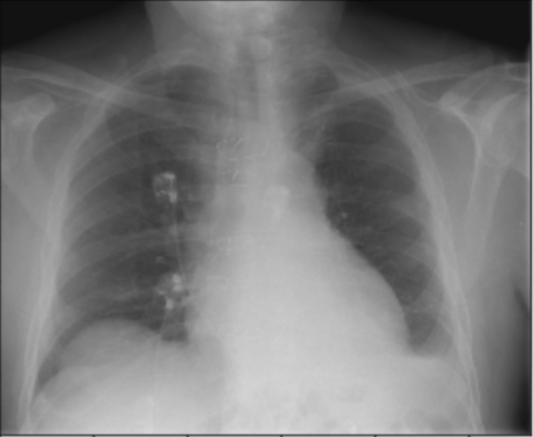

In [23]:
img = cv2.imread('lung.png', 0)
print(img)
print(img.dtype)
print(img.shape)
cv2_imshow(img)

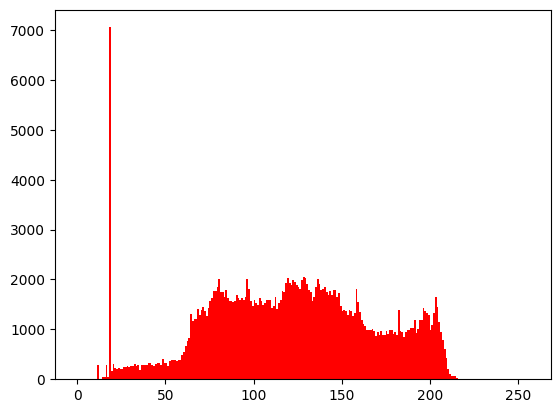

In [24]:
# Arguments are (img, bins, range)
_ = plt.hist(img.flatten(),256,[0,256], color = 'r')

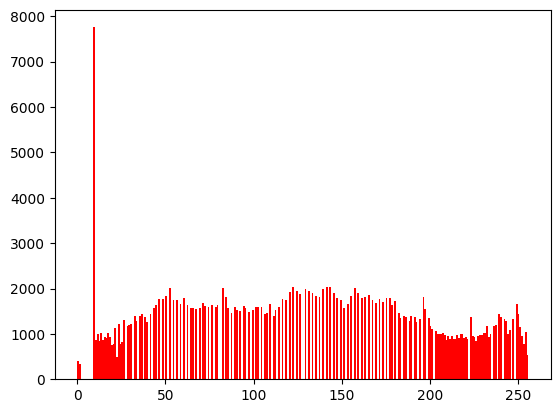

In [25]:
# Histogram equalization can be used to improve constrast of img
equ = cv2.equalizeHist(img)
_ = plt.hist(equ.flatten(),256,[0,256], color = 'r')

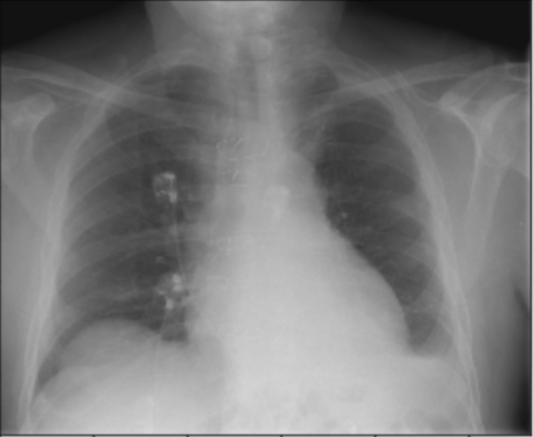

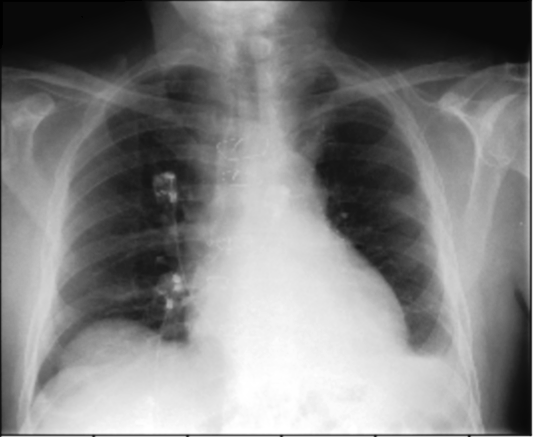

In [26]:
cv2_imshow(img)
cv2_imshow(equ)

## Thresholding

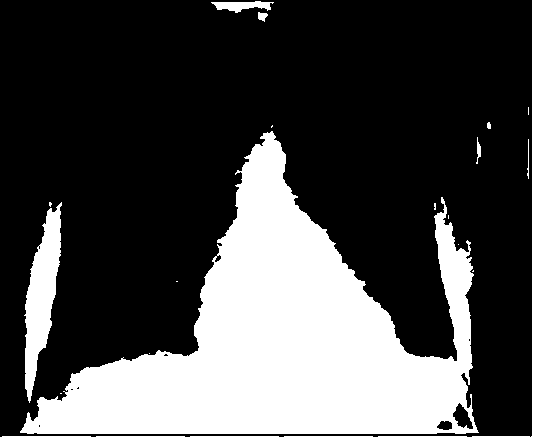

In [27]:
threshold_value = 150

# Apply the threshold
_, thresholded_image = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# Display the thresholded image
cv2_imshow(thresholded_image)

## Denoising

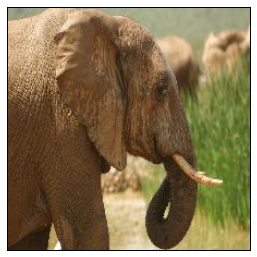

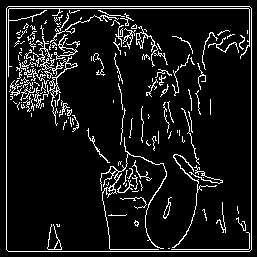

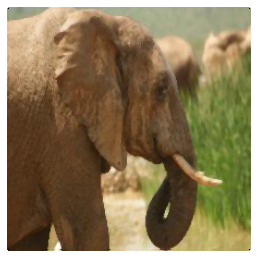

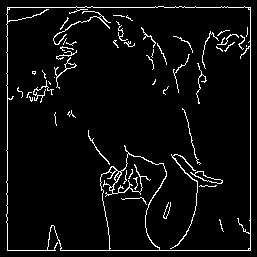

In [28]:
# Median filter is one way of denoising
img = cv2.imread('elephant.png')[:,:257,:]
median = cv2.medianBlur(img, 3)
cv2_imshow(img)
cv2_imshow((cv2.Canny(img,100,200)))
cv2_imshow(median)
edges = cv2.Canny(median,100,200)
cv2_imshow(edges)

More Details on different image processing operations can be found in:


1.   https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_core/py_table_of_contents_core/py_table_of_contents_core.html
2.   https://scikit-image.org/docs/stable/auto_examples/index.html
